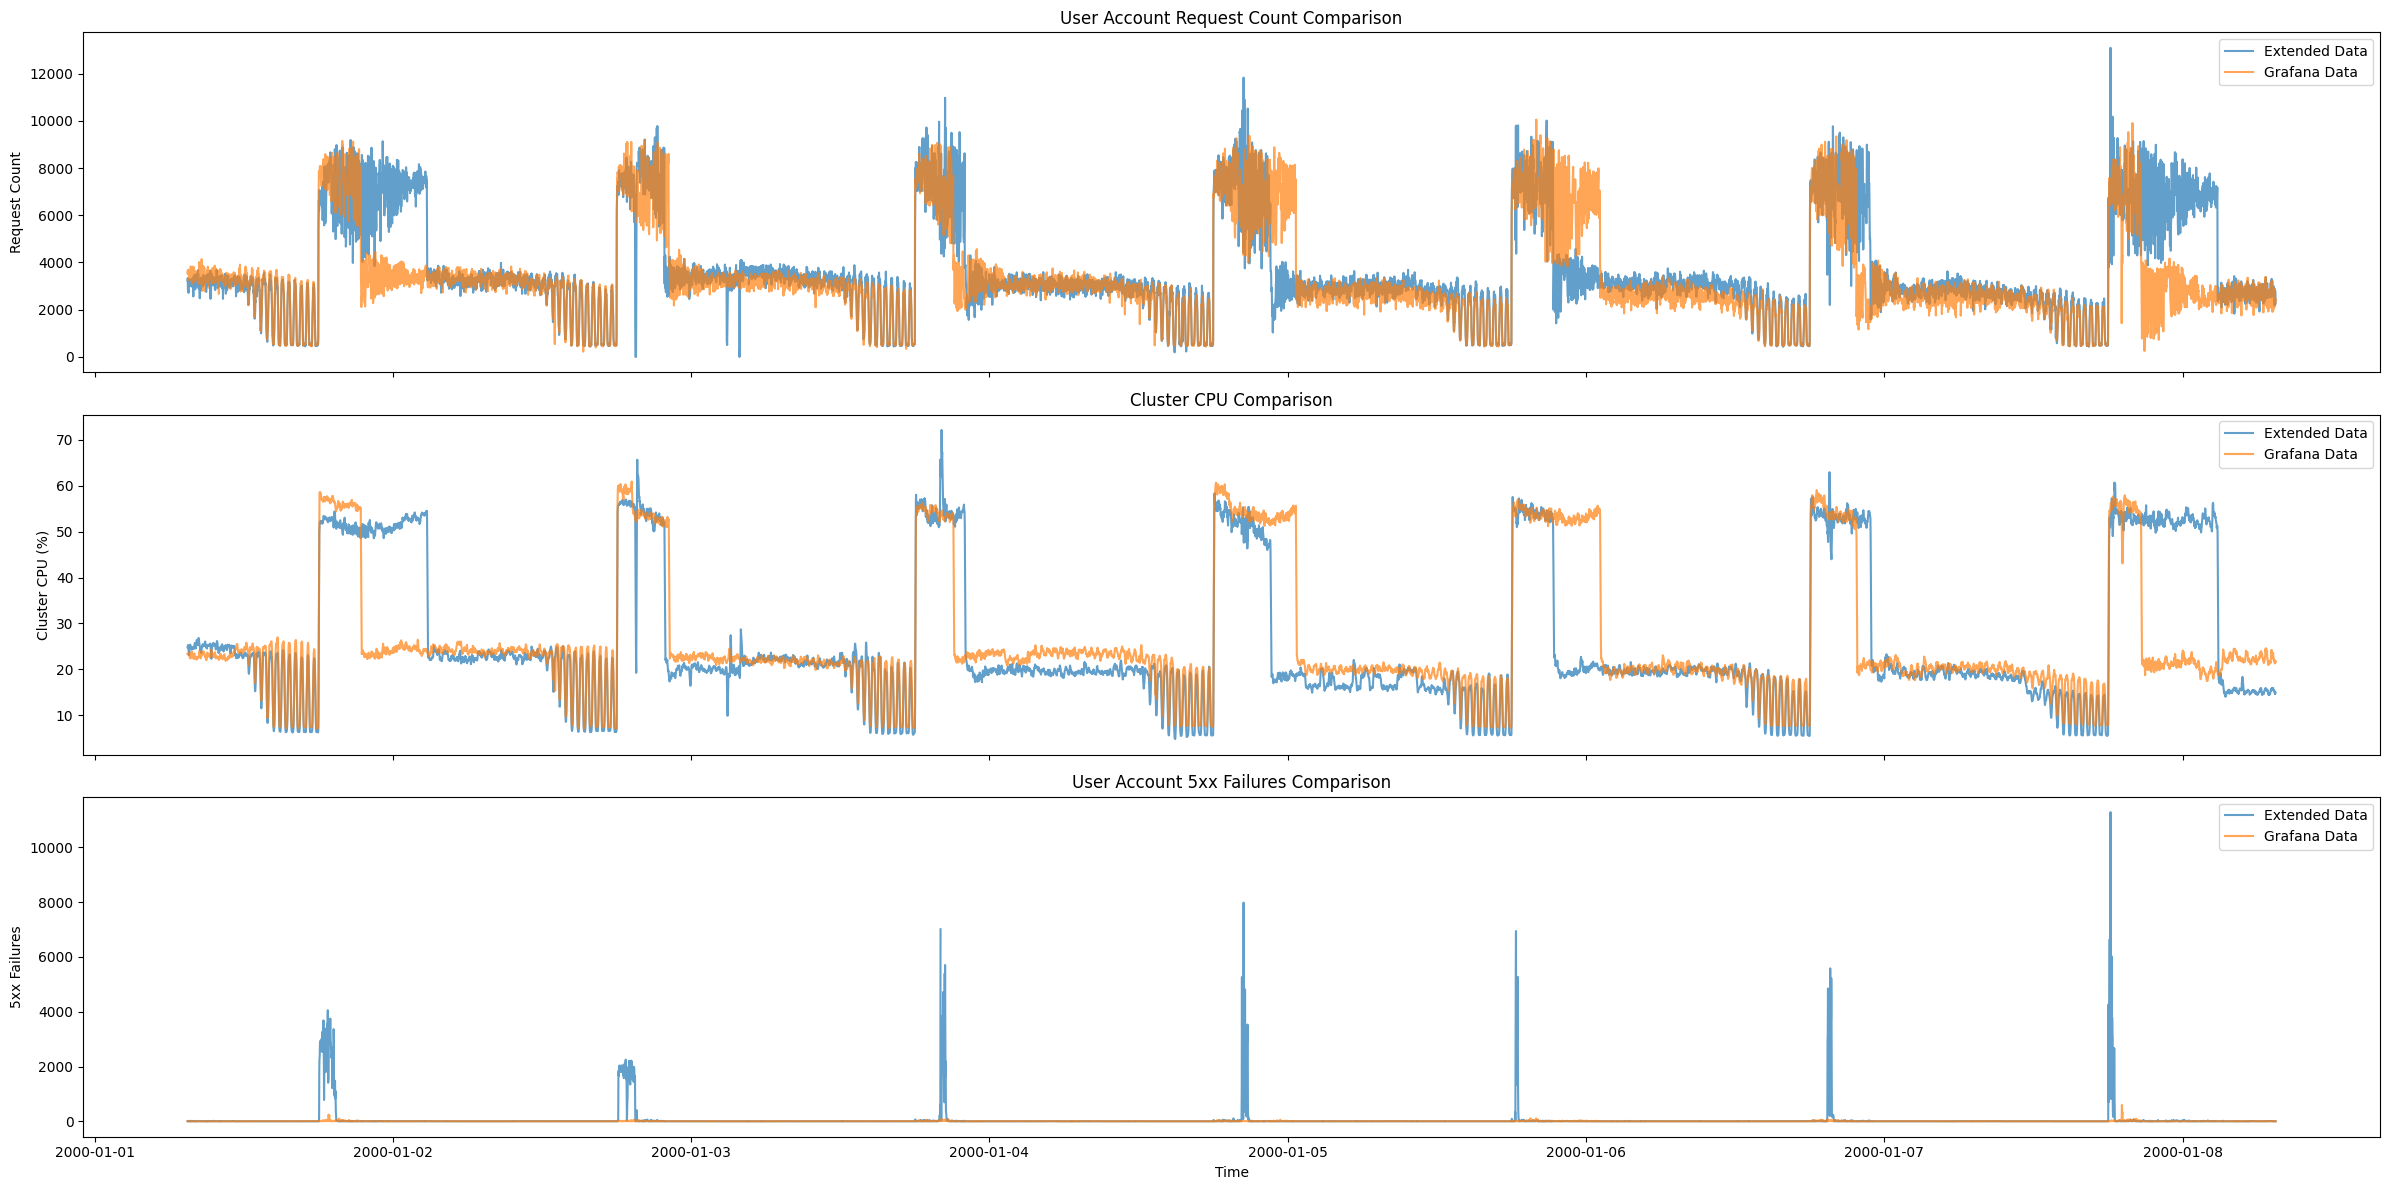

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Update these file paths with the actual paths to your datasets
file_path_1 = '~/Downloads/grafana_data_new.csv'
file_path_2 = '~/Downloads/grafana_data.csv'

# Read the datasets
extended_data = pd.read_csv(file_path_1)
grafana_data = pd.read_csv(file_path_2)

# Convert 'Time' columns to datetime
extended_data['Time'] = pd.to_datetime(extended_data['Time'])
grafana_data['Time'] = pd.to_datetime(grafana_data['Time'])

# Normalize time to a 7-day period starting from a base date
def normalize_time(df, base_time='2000-01-01 07:29:00'):
    base_time = pd.to_datetime(base_time)
    df['Normalized Time'] = (df['Time'] - df['Time'].iloc[0]) + base_time
    return df

# Apply normalization to both datasets
extended_data = normalize_time(extended_data)
grafana_data = normalize_time(grafana_data)

# Filter data for the normalized 7-day range
start_time = pd.to_datetime('2000-01-01 07:29:00')
end_time = pd.to_datetime('2000-01-08 07:29:00')

extended_filtered = extended_data[(extended_data['Normalized Time'] >= start_time) & (extended_data['Normalized Time'] <= end_time)]
grafana_filtered = grafana_data[(grafana_data['Normalized Time'] >= start_time) & (grafana_data['Normalized Time'] <= end_time)]

# Create a single figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(24, 12), sharex=True)

# Plot User Account Request Count
axes[0].plot(extended_filtered['Normalized Time'], extended_filtered['User Account Request Count'], label='Reactive Scaling', alpha=0.7)
axes[0].plot(grafana_filtered['Normalized Time'], grafana_filtered['User Account Request Count'], label='Predictive Scaling', alpha=0.7)
axes[0].set_title('User Account Request Count Comparison')
axes[0].set_ylabel('Request Count')
axes[0].legend()

# Plot Cluster CPU
axes[1].plot(extended_filtered['Normalized Time'], extended_filtered['Cluster CPU'], label='Reactive Scaling', alpha=0.7)
axes[1].plot(grafana_filtered['Normalized Time'], grafana_filtered['Cluster CPU'], label='Predictive Scaling', alpha=0.7)
axes[1].set_title('Cluster CPU Comparison')
axes[1].set_ylabel('Cluster CPU (%)')
axes[1].legend()

# Plot User Account 5xx Failures
axes[2].plot(extended_filtered['Normalized Time'], extended_filtered['User Account 5xx Failures'], label='Reactive Scaling', alpha=0.7)
axes[2].plot(grafana_filtered['Normalized Time'], grafana_filtered['User Account 5xx Failures'], label='Predictive Scaling', alpha=0.7)
axes[2].set_title('User Account 5xx Failures Comparison')
axes[2].set_ylabel('5xx Failures')
axes[2].set_xlabel('Time')
axes[2].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
